In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sghmc(U, gradU, m, dt, steps, x, C, V):
    
    B = 0.5 * V * dt
    D = (2*(C-B)*dt)**0.5
    p = np.random.randn(1) * (m**0.5)
    for i in range(steps):
        x = x + dt * p / m
        p = p - dt * gradU(x) - dt * C * p/m -np.random.randn(1) * D
    return x

def U(x):
    return(-2 * x**2 + x**4)

def gradU(x):
    return(-4 * x + 4 * x**3 + 2*np.random.randn(1))

In [3]:
n = 5000
step = 0.1
m = 1
dt = 0.1
steps = 50
theta = np.arange(-3, 3, step=step)
C = 3
V = 4

In [4]:
np.random.seed(663)

samples = np.zeros((n))

x = np.array([0])
for i in range(n):
    x = sghmc(U, gradU, m, dt, steps, x, C, V)
    samples[i] = x

x_sghmc = np.histogram(samples, theta)[1]
y_sghmc = np.histogram(samples, theta)[0] / sum((np.histogram(samples, theta)[0]))
y_sghmc = y_sghmc/step

y_true = np.exp(-U(theta)) / sum(np.exp(-U(theta))) / step


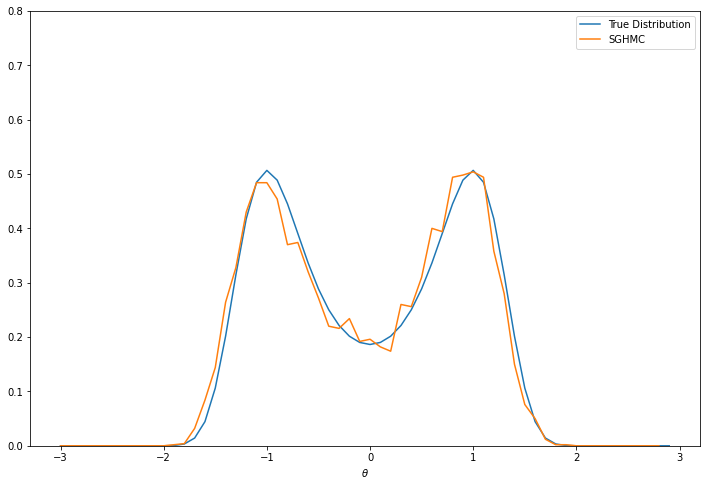

In [5]:
plt.figure(figsize = (12,8))
plt.plot(theta,y_true, label = 'True Distribution')
plt.plot(x_sghmc[:-1], y_sghmc, label = 'SGHMC')

plt.legend(loc = 1)
plt.ylim(0, 0.8)
plt.xlabel('$\\theta$')
plt.savefig("figure1.png")